#### Chris Sutton
#### Lab 6


Lab comments - This lab showed how to build a model that could perform enitiy recognition. The model certinly is powerful and overall does a good job tagging data for entity names

# Lab 6: Sequence Labeling


This is a two-week lab, due October 24.

## Background

This laboratory explores sequence labeling using a neural sequence tagger. By way of background, you might optionally try the following:
1.	Work	through	this [introductory PyTorch	tutorial](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html).
2.	Work	through	 this	[RNN tutorial](https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html),	which	has	you	 train	an	RNN	 to	classify surnames based	on their	language/ethnicity.

  What	are	the	top	predictions	for	the	name	McNamee?		How	about	Ocasio-Cortez?
3.	We will be using an LSTM-CRF system written by Liu et al. Skim	through	[their	paper](https://arxiv.org/pdf/1709.04109.pdf) for details on how the system works.

## Setting Up and Running the Tagger

This notebook describes how to run the Liu LSTM/CRF tagger on Colab. You will be using your Google drive to store your project code and data. In the following, most of the manipulation of files on your drive are done through Colab. However, it's fine to use the Google Drive interface if you prefer. You may also use a platform other than Colab if you prefer.


This lab needs to run on a GPU. Click the 'runtime' menu above, select 'change runtime type' and verify you're using a GPU.

Start by mounting your Google drive. You will be prompted to sign in to your Google account.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Create a directory to house your project, and move to it. The ! spawns a new process, while the % executes the command in the current process.

In [3]:
# Change this path to point to your own directory:
labdir = '/content/drive/My Drive/NaturalLangaugeProcessing/lab06'
# !mkdir -p "$labdir"
# !mkdir -p "$labdir/data"
# !mkdir -p "$labdir/checkpoint"
%cd "$labdir"
!ls


/content/drive/My Drive/NaturalLangaugeProcessing/lab06
checkpoint  data  LM-LSTM-CRF


Now, outside of Colab, obtain the file ```conll003-englishversion.zip``` from Canvas (under Module 7). Unzip it, and upload the files ```train.txt```, ```valid.txt```, and ```test.txt``` to the ```data``` directory you just created.

Obtain the Liu tagger.

In [ ]:
# !git clone https://github.com/LiyuanLucasLiu/LM-LSTM-CRF


fatal: destination path 'LM-LSTM-CRF' already exists and is not an empty directory.


Obtain pre-computed embeddings. This may take a few minutes.

In [ ]:
# !mkdir -p LM-LSTM-CRF/embedding
# !cd LM-LSTM-CRF/embedding ; wget http://nlp.stanford.edu/data/glove.6B.zip
# !cd LM-LSTM-CRF/embedding ; unzip glove.6B.zip

--2022-10-14 17:20:51--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-10-14 17:20:52--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-10-14 17:20:52--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

The ```requirements.txt``` file that comes with the tagger is not compatible with colab, so you'll need to install PyTorch explicitly. PyTorch has recently deprecated certain datatypes, so to prevent being overrun by warning messages, back off to a previous version of PyTorch. (I get an error about torchtext, but it did not appear to affect anything.)

In [ ]:
!pip install torch==1.2.0 torchvision==0.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 748.9 MB 653 bytes/s 
     |████████████████████████████████| 8.8 MB 39.4 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.13.1+cu113
    Uninstalling torchvision-0.13.1+cu113:
      Successfully uninstalled torchvision-0.13.1+cu113
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.13.1 requires torch==1.12.1, but you have torch 1.2.0 which is incompatible.
torchaudio 0.12.1+cu113 requires torch==1.12.1, but you have torch 1.2.0 which is incompatible.
fastai 2.7.10 requires torch<1.14,>=1.7, but you have torch

Finally, you're ready to train your system:

import time

In [ ]:
import time

In [ ]:
# Run 1
start = time.time()
!cd LM-LSTM-CRF ; python -W ignore train_wc.py \
  --emb_file embedding/glove.6B.100d.txt \
  --train_file ../data/train.txt \
  --dev_file ../data/valid.txt \
  --test_file ../data/test.txt \
  --checkpoint ../checkpoint/ner_ \
  --caseless --fine_tune --high_way --co_train --epoch 25
end = time.time()

setting:
Namespace(batch_size=10, caseless=True, char_dim=30, char_hidden=300, char_layers=1, checkpoint='../checkpoint/ner_', clip_grad=5.0, co_train=True, dev_file='../data/valid.txt', drop_out=0.55, emb_file='embedding/glove.6B.100d.txt', epoch=25, eva_matrix='fa', fine_tune=False, gpu=0, high_way=True, highway_layers=1, lambda0=1, least_iters=50, load_check_point='', load_opt=False, lr=0.015, lr_decay=0.05, mini_count=5, momentum=0.9, patience=15, rand_embedding=False, shrink_embedding=False, small_crf=True, start_epoch=0, test_file='../data/test.txt', train_file='../data/train.txt', unk='unk', update='sgd', word_dim=100, word_hidden=300, word_layers=1)
loading corpus
constructing coding table
feature size: '4915'
loading embedding
embedding size: '400060'
constructing dataset
building model
device: 0
DEV : total : dev_f1: 0.7535 dev_rec: 0.6683 dev_pre: 0.8636 dev_acc: 0.9415 | 

DEV : B-LOC : dev_f1: 0.8328 dev_rec: 0.7523 dev_pre: 0.9325 dev_acc: 0.0000 | {'O': 333, 'B-ORG': 74,

In [ ]:
# Run 2

!cd LM-LSTM-CRF ; python -W ignore train_wc.py \
  --emb_file embedding/glove.6B.100d.txt \
  --train_file ../data/train.txt \
  --dev_file ../data/valid.txt \
  --test_file ../data/test.txt \
  --checkpoint ../checkpoint/ner2_ \
  --caseless --fine_tune --high_way --co_train --epoch 25


setting:
Namespace(batch_size=10, caseless=True, char_dim=30, char_hidden=300, char_layers=1, checkpoint='../checkpoint/ner2_', clip_grad=5.0, co_train=True, dev_file='../data/valid.txt', drop_out=0.55, emb_file='embedding/glove.6B.100d.txt', epoch=25, eva_matrix='fa', fine_tune=False, gpu=0, high_way=True, highway_layers=1, lambda0=1, least_iters=50, load_check_point='', load_opt=False, lr=0.015, lr_decay=0.05, mini_count=5, momentum=0.9, patience=15, rand_embedding=False, shrink_embedding=False, small_crf=True, start_epoch=0, test_file='../data/test.txt', train_file='../data/train.txt', unk='unk', update='sgd', word_dim=100, word_hidden=300, word_layers=1)
loading corpus
constructing coding table
feature size: '4915'
loading embedding
embedding size: '400060'
constructing dataset
building model
device: 0
DEV : total : dev_f1: 0.7665 dev_rec: 0.7479 dev_pre: 0.7860 dev_acc: 0.9450 | 

DEV : B-LOC : dev_f1: 0.8627 dev_rec: 0.8928 dev_pre: 0.8346 dev_acc: 0.0000 | {'O': 74, 'B-ORG': 76,

In [ ]:
# Run 3

!cd LM-LSTM-CRF ; python -W ignore train_wc.py \
  --emb_file embedding/glove.6B.100d.txt \
  --train_file ../data/train.txt \
  --dev_file ../data/valid.txt \
  --test_file ../data/test.txt \
  --checkpoint ../checkpoint/ner3_ \
  --caseless --fine_tune --high_way --co_train --epoch 25


setting:
Namespace(batch_size=10, caseless=True, char_dim=30, char_hidden=300, char_layers=1, checkpoint='../checkpoint/ner3_', clip_grad=5.0, co_train=True, dev_file='../data/valid.txt', drop_out=0.55, emb_file='embedding/glove.6B.100d.txt', epoch=25, eva_matrix='fa', fine_tune=False, gpu=0, high_way=True, highway_layers=1, lambda0=1, least_iters=50, load_check_point='', load_opt=False, lr=0.015, lr_decay=0.05, mini_count=5, momentum=0.9, patience=15, rand_embedding=False, shrink_embedding=False, small_crf=True, start_epoch=0, test_file='../data/test.txt', train_file='../data/train.txt', unk='unk', update='sgd', word_dim=100, word_hidden=300, word_layers=1)
loading corpus
constructing coding table
feature size: '4915'
loading embedding
embedding size: '400060'
constructing dataset
building model
device: 0
DEV : total : dev_f1: 0.7567 dev_rec: 0.7115 dev_pre: 0.8079 dev_acc: 0.9439 | 

DEV : B-LOC : dev_f1: 0.8709 dev_rec: 0.8487 dev_pre: 0.8944 dev_acc: 0.0000 | {'O': 126, 'B-ORG': 78

In [ ]:
# Run 4

!cd LM-LSTM-CRF ; python -W ignore train_wc.py \
  --emb_file embedding/glove.6B.100d.txt \
  --train_file ../data/train.txt \
  --dev_file ../data/valid.txt \
  --test_file ../data/test.txt \
  --checkpoint ../checkpoint/ner4_ \
  --caseless --fine_tune --high_way --co_train --epoch 25


setting:
Namespace(batch_size=10, caseless=True, char_dim=30, char_hidden=300, char_layers=1, checkpoint='../checkpoint/ner4_', clip_grad=5.0, co_train=True, dev_file='../data/valid.txt', drop_out=0.55, emb_file='embedding/glove.6B.100d.txt', epoch=25, eva_matrix='fa', fine_tune=False, gpu=0, high_way=True, highway_layers=1, lambda0=1, least_iters=50, load_check_point='', load_opt=False, lr=0.015, lr_decay=0.05, mini_count=5, momentum=0.9, patience=15, rand_embedding=False, shrink_embedding=False, small_crf=True, start_epoch=0, test_file='../data/test.txt', train_file='../data/train.txt', unk='unk', update='sgd', word_dim=100, word_hidden=300, word_layers=1)
loading corpus
constructing coding table
feature size: '4915'
loading embedding
embedding size: '400060'
constructing dataset
building model
device: 0
DEV : total : dev_f1: 0.7600 dev_rec: 0.7255 dev_pre: 0.7979 dev_acc: 0.9444 | 

DEV : B-LOC : dev_f1: 0.8669 dev_rec: 0.8280 dev_pre: 0.9097 dev_acc: 0.0000 | {'O': 115, 'B-ORG': 14

In [ ]:
end-start

2353.59254860878

As your model trains, you will see performance figures on the development set, such as:
```
DEV : total : dev_f1: 0.7711 dev_rec: 0.7058 dev_pre: 0.8497 dev_acc: 0.9447
```
If performance on the development set has improved in this epoch over the previous high score, you will also see performance numbers on the test set:
```
TEST : total : test_f1: 0.7479 test_rec: 0.6880 test_pre: 0.8191 test_acc: 0.9404
```


## Assignment

(10 points) Train for the CoNLL 2003 NER task using the provided data.
This will be your 'base run.'
The system will report dev and (sometimes) test scores at each iteration.
Within 20 iterations you should see F1 scores on the test partition of 90% or better.
The default is 200 epochs.
You don't have to train that far.
**Report overall precision, recall, and F1, as well as precision, recall, and F1 for each of the identified entity types. (Note that these are not actually scores for the entity types, but rather scores for the individual B- and I- tags.)**

**Create a plot of the (decreasing) loss values from the training process.
Then, train the system three more times on the same test data.
Report your minimum, mean, and maximum overall F1 scores.
Let the system train for at least twenty epochs**
(if you let it continue to run you'll likely see it stop after about 100 epochs).
(Note that the Liu system uses both ‘iteration’ and ‘epoch’ to mean ‘epoch’.)
**Plot the F1 performance on both the dev and test data.**
You can use the json data in ```checkpoint/ner_cwlm_lstm_crf.json```, or scrape the output of the process.
**State why the system reports performance on the test data only when performance on the dev data improves.**








The system reports performance on test data when dev F1 performance improves over the last cross-validation split. 

TEST Overall Total | Result
-------------------|----------------
Test_f1:           |0.9042
Test_recall:       |0.9012
Test_precision:    |0.9073
Test_accuracy:     |0.9794

Test Entity  B-PER   | Result
---------------------|--------
Test_f1:             |0.9562
Test_rec:            |0.9462
Test_pre:            |0.9665

Test Entity  I-PER   | Result
---------------------|--------
Test_f1:             |0.9833
Test_rec:            |0.9922
Test_pre:            |0.9745

Test Entity  B-LOC   | Result
---------------------|--------
Test_f1:             |0.9317
Test_rec:            |0.9490
Test_pre:            |0.9150

Test Entity  O       | Result
---------------------|--------
Test_f1:             |0.9941
Test_rec:            |0.9939
Test_pre:            |0.9943
 
Test Entity  I-LOC   | Result
---------------------|--------
Test_f1:             |0.8516
Test_rec:            |0.9377
Test_pre:            |0.7799

Test Entity  B-MISC | Result
--------------------|--------
Test_f1:            |0.8242
Test_rec:           |0.8248
Test_pre:           |0.8236

Test Entity  I-MISC | Result
--------------------|--------
Test_f1:            |0.6757
Test_rec:           |0.6944
Test_pre:           |0.6579 

Test Entity  B-ORG  | Result
--------------------|--------
Test_f1:            |0.8946
Test_rec:           |0.8766
Test_pre:           |0.9134
 
Test Entity  I-ORG  | Result
--------------------|--------
Test_f1:            |0.8620
Test_rec:           |0.8455
Test_pre:           |0.8792

In [ ]:
lossY = [3.7517452499859703,2.4213456662178334,1.996948428127443,1.6997006962686554,1.1394612775495538, 0.8687314343930833, 0.7877699512535253, 0.7070024151820027,\
        0.6772537396447885, 0.6190704922171927, 0.6026205963915171, 0.5616763982209603, 0.5392741292058602, 0.5288913170292469, 0.49894048228727755, 0.48213486592075855,\
        0.4582392002825091, 0.4485874198686221, 0.4313746320673597, 0.4361877977431326, 0.40258791311327724, 0.39424415097284515, 0.39547653983541364, 0.38138092139353785,\
        0.3730704646983901]

In [ ]:
lossX= [x for x in range(25) ]

In [ ]:
import matplotlib.pyplot as plt

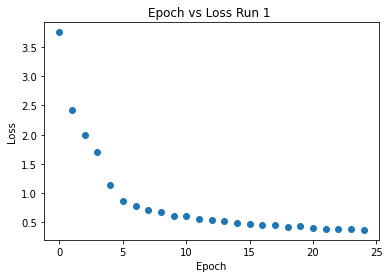

In [ ]:
plt.scatter(lossX, lossY)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Epoch vs Loss Run 1 ')
plt.show()


In [ ]:
f1scores= [0.9042, 0.9048, 0.9056, 0.9058]
mean = sum(f1scores)/4
mean

0.9051

F1 statistics | Results
--------------|--------
minimum       |.9042
maximum       |.9058
mean          |.9051


In [ ]:
run1 =[{"loss": 3.761263884392012, "dev_f1": 0.7535104364326376, "dev_acc": 0.941493711304077, "test_f1": 0.729574678536103, "test_acc": 0.9370302573489825},\
       {"loss": 2.411183857537838, "dev_f1": 0.8269078774040572, "dev_acc": 0.9588216969744169, "test_f1": 0.7947265806331817, "test_acc": 0.9528372994508453},\
       {"loss": 2.019656054463614, "dev_f1": 0.8542503054634317, "dev_acc": 0.9641369105564425, "test_f1": 0.8206166589967787, "test_acc": 0.9575966404651663},\
       {"loss": 1.7647258027272557, "dev_f1": 0.8615764415447011, "dev_acc": 0.9653634983061408, "test_f1": 0.83086108778804, "test_acc": 0.9591902659631744},\
       {"loss": 1.5741746242503882, "dev_f1": 0.8869475847893116, "dev_acc": 0.9731513570343834, "test_f1": 0.8463267691754337, "test_acc": 0.9643372456121461},\
       {"loss": 1.1201384433102695, "dev_f1": 0.9076508257499156, "dev_acc": 0.9803551263580078, "test_f1": 0.8714361607933416, "test_acc": 0.9717454506299128},\
       {"loss": 0.840030454099344, "dev_f1": 0.9186538136309826, "dev_acc": 0.9830614072660722, "test_f1": 0.8865557433935404, "test_acc": 0.9752126628620652},\
       {"loss": 0.7684281055873808, "dev_f1": 0.9268580085851359, "dev_acc": 0.9850083719481328, "test_f1": 0.8845847704961528, "test_acc": 0.9749757725853343},\
       {"loss": 0.6848910767833436, "dev_f1": 0.9254763109087845, "dev_acc": 0.9844242825435147},\
       {"loss": 0.6486424856465578, "dev_f1": 0.928360475909206, "dev_acc": 0.9842879950157705,"test_f1": 0.8894401133947555, "test_acc": 0.9760094756110692},\
       {"loss": 0.5978602473882383, "dev_f1": 0.9301152131864436, "dev_acc": 0.984755266539465, "test_f1": 0.892011311417462, "test_acc": 0.9760094756110692},\
      {"loss": 0.5787157069155278, "dev_f1": 0.9339058684853077, "dev_acc": 0.9859234453487014, "test_f1": 0.8909734513274337, "test_acc": 0.9766555400021536},\
       {"loss": 0.5588946598545538, "dev_f1": 0.9343421605716687, "dev_acc": 0.9861765507573692, "test_f1": 0.8976489305285488, "test_acc": 0.9776892430278884},\
       {"loss": 0.5297671522653548, "dev_f1": 0.9380695241309484, "dev_acc": 0.9870137455706554, "test_f1": 0.8980750465714539, "test_acc": 0.9780122752234306},\
       {"loss": 0.49674168809697594, "dev_f1": 0.9374050953264721, "dev_acc": 0.9868190491024493},\
       {"loss": 0.48619641248221795, "dev_f1": 0.9395553301208893, "dev_acc": 0.9871889723920408, "test_f1": 0.902068720589541, "test_acc": 0.9784860557768924},\
       {"loss": 0.45997224723212127, "dev_f1": 0.9399008153315961, "dev_acc": 0.987675713562556, "test_f1": 0.9001590386994168, "test_acc": 0.9785075912565953},\
       {"loss": 0.4454194024679811, "dev_f1": 0.9367728882144664, "dev_acc": 0.9863128382851135},\
       {"loss": 0.44722515617852143, "dev_f1": 0.9387376759079802, "dev_acc": 0.9873447295666057},\
       {"loss": 0.42779759663760936, "dev_f1": 0.9404621352673299, "dev_acc": 0.9875394260348117, "test_f1": 0.9054030115146148, "test_acc": 0.9796274362011413},\
       {"loss": 0.40954809347969107, "dev_f1": 0.9421181228410144, "dev_acc": 0.9881819243798917, "test_f1": 0.9030716119323714, "test_acc": 0.9790675137288684},\
       {"loss": 0.40592196625346055, "dev_f1": 0.9432528289140348, "dev_acc": 0.9879872279116857, "test_f1": 0.9042458696038373, "test_acc": 0.9794336168838161}]

In [ ]:
dev_f1_1=[x['dev_f1'] for x in run1]
dev_f1_1x=[x for x in range(len(run1))]
test_f1_1=[x['test_f1'] for x in run1 if 'test_f1' in x.keys()]
testX_f1_1=[x for x in range(len(run1)) if 'test_f1' in run1[x].keys()]



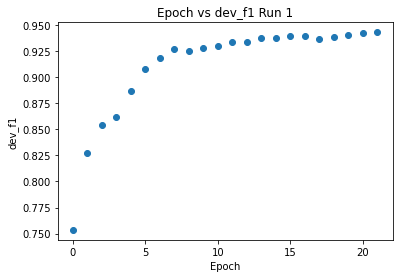

In [ ]:
plt.scatter(dev_f1_1x, dev_f1_1)
plt.ylabel('dev_f1')
plt.xlabel('Epoch')
plt.title('Epoch vs dev_f1 Run 1')
plt.show()

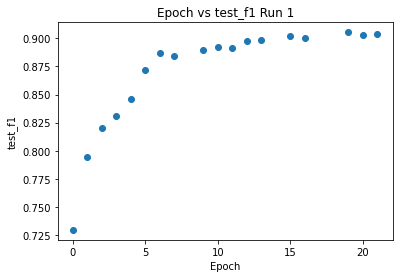

In [ ]:
plt.scatter(testX_f1_1, test_f1_1)
plt.ylabel('test_f1')
plt.xlabel('Epoch')
plt.title('Epoch vs test_f1 Run 1')
plt.show()

In [ ]:
run2 =  [{"loss": 3.742563151236449, "dev_f1": 0.7664711969644705, "dev_acc": 0.9450371870254274, "test_f1": 0.740086517664023, "test_acc": 0.9360826962420588},\
         {"loss": 2.417173421757553, "dev_f1": 0.8150114416475973, "dev_acc": 0.95346754409875, "test_f1": 0.7876679230694887, "test_acc": 0.9488532357058254},\
         {"loss": 1.9239087446796765, "dev_f1": 0.8680225010817828, "dev_acc": 0.9683034149760523, "test_f1": 0.8326812846874716, "test_acc": 0.9612576720146441},\
         {"loss": 1.209239871834655, "dev_f1": 0.9012947704725072, "dev_acc": 0.9785833884973326, "test_f1": 0.8648457526739151, "test_acc": 0.9683859157962743},\
         {"loss": 0.9333959754717379, "dev_f1": 0.9065749748406575, "dev_acc": 0.9805303531793933, "test_f1": 0.8724229074889868, "test_acc": 0.9721330892645633},\
         {"loss": 0.8341239905885685, "dev_f1": 0.9167718589581756, "dev_acc": 0.9833923912620225, "test_f1": 0.8849322349189477, "test_acc": 0.975923333692258},\
         {"loss": 0.7723909590910302, "dev_f1": 0.9263705818151289, "dev_acc": 0.9848720844203886, "test_f1": 0.8871081366678408, "test_acc": 0.975126520943254},\
         {"loss": 0.7041033883074002, "dev_f1": 0.9295418108176525, "dev_acc": 0.9853588255909038, "test_f1": 0.8957816377171216, "test_acc": 0.9776892430278884},\
         {"loss": 0.666292554281495, "dev_f1": 0.9293830485649357, "dev_acc": 0.9855145827654687},\
         {"loss": 0.6129732803012024, "dev_f1": 0.9313337265144493, "dev_acc": 0.9862154900510105, "test_f1": 0.8949140528087897, "test_acc": 0.9776031011090772},\
         {"loss": 0.6009397997524507, "dev_f1": 0.9352445193929173, "dev_acc": 0.9864491258128577, "test_f1": 0.8988226962910506, "test_acc": 0.977969204264025},\
         {"loss": 0.5629742017247983, "dev_f1": 0.9345303633437791, "dev_acc": 0.986137611463728},\
         {"loss": 0.5516929930087761, "dev_f1": 0.9362633661699082, "dev_acc": 0.9865075347533195, "test_f1": 0.9022729282745201, "test_acc": 0.9787444815333262},\
         {"loss": 0.5083936643970542, "dev_f1": 0.9371785142086179, "dev_acc": 0.9871500330983995, "test_f1": 0.9022383438025303, "test_acc": 0.9787229460536233},\
         {"loss": 0.5020385433196975, "dev_f1": 0.9350758853288363, "dev_acc": 0.9864296561660372},\
         {"loss": 0.483074809531307, "dev_f1": 0.938483547925608, "dev_acc": 0.9873057902729645, "test_f1": 0.9030891438658429, "test_acc": 0.9786152686551093},\
         {"loss": 0.46255258555886875, "dev_f1": 0.9380367065162485, "dev_acc": 0.9872863206261439},\
         {"loss": 0.4385194773897135, "dev_f1": 0.9390336453326589, "dev_acc": 0.9874810170943499, "test_f1": 0.9070776862432456, "test_acc": 0.9800796812749004},\
         {"loss": 0.4274566276030828, "dev_f1": 0.939299282397636, "dev_acc": 0.9874615474475293, "test_f1": 0.9061752458580667, "test_acc": 0.979907397437278},\
         {"loss": 0.4096706563542358, "dev_f1": 0.9409182984469953, "dev_acc": 0.9878898796775827, "test_f1": 0.9039467849223947, "test_acc": 0.9796489716808442},\
         {"loss": 0.4013963648786101, "dev_f1": 0.9421765844625873, "dev_acc": 0.9880261672053269, "test_f1": 0.9063107654233692, "test_acc": 0.9797781845590611},\
         {"loss": 0.3897142607224521, "dev_f1": 0.9405815423514539, "dev_acc": 0.9879288189712239},\
         {"loss": 0.37875713145729717, "dev_f1": 0.9420387531592249, "dev_acc": 0.9881819243798917},\
         {"loss": 0.3826435181890158, "dev_f1": 0.9442385444743935, "dev_acc": 0.9887465441376894, "test_f1": 0.9048251438689685, "test_acc": 0.9794766878432217}]

In [ ]:
dev_f1_2=[x['dev_f1'] for x in run2]
dev_f1_2x=[x for x in range(len(run2))]
test_f1_2=[x['test_f1'] for x in run2 if 'test_f1' in x.keys()]
testX_f1_2=[x for x in range(len(run2)) if 'test_f1' in run2[x].keys()]

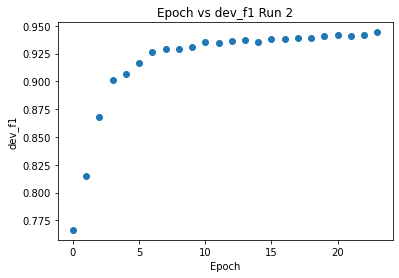

In [ ]:
plt.scatter(dev_f1_2x, dev_f1_2)
plt.ylabel('dev_f1')
plt.xlabel('Epoch')
plt.title('Epoch vs dev_f1 Run 2')
plt.show()

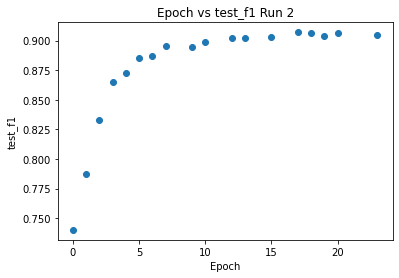

In [ ]:
plt.scatter(testX_f1_2, test_f1_2)
plt.ylabel('test_f1')
plt.xlabel('Epoch')
plt.title('Epoch vs test_f1 Run 2')
plt.show()

In [ ]:
run3 =[{"loss": 3.7517452499859703, "dev_f1": 0.7566890380313199, "dev_acc": 0.9439274171566527, "test_f1": 0.7352252505385407, "test_acc": 0.9373532895445246},\
         {"loss": 2.4213456662178334, "dev_f1": 0.8358313612060654, "dev_acc": 0.9606129044819127, "test_f1": 0.8001476287137848, "test_acc": 0.9532464735651986},\
         {"loss": 1.996948428127443, "dev_f1": 0.8587373561213812, "dev_acc": 0.9657139519489116, "test_f1": 0.8159526232997132, "test_acc": 0.9568859696349736}, \
         {"loss": 1.6997006962686554, "dev_f1": 0.8884694577899794, "dev_acc": 0.9737938553794634, "test_f1": 0.8502067973386083, "test_acc": 0.9656078389146118},\
         {"loss": 1.1394612775495538, "dev_f1": 0.9046262152195776, "dev_acc": 0.9785444492036914, "test_f1": 0.8645888360626871, "test_acc": 0.966835361257672},\
         {"loss": 0.8687314343930833, "dev_f1": 0.9185821335354044, "dev_acc": 0.9827888322105837, "test_f1": 0.8795180722891567, "test_acc": 0.9738343921610854},\
         {"loss": 0.7877699512535253, "dev_f1": 0.9210194297249559, "dev_acc": 0.9831976947938165, "test_f1": 0.8844283314174552, "test_acc": 0.9739851405190051},\
         {"loss": 0.7070024151820027, "dev_f1": 0.9263033774109323, "dev_acc": 0.9847942058331062, "test_f1": 0.8846255857130227, "test_acc": 0.9750403790244427},\
         {"loss": 0.6772537396447885, "dev_f1": 0.921797564048719, "dev_acc": 0.9838986020793583},\
         {"loss": 0.6190704922171927, "dev_f1": 0.932297822049637, "dev_acc": 0.985845566761419, "test_f1": 0.892695482382178, "test_acc": 0.9766986109615592}, \
         {"loss": 0.6026205963915171, "dev_f1": 0.9293149764942915, "dev_acc": 0.9856314006463923},\
         {"loss": 0.5616763982209603, "dev_f1": 0.9338390223345976, "dev_acc": 0.986488065106499, "test_f1": 0.8958259639193491, "test_acc": 0.9775384946699688}, \
         {"loss": 0.5392741292058602, "dev_f1": 0.9337943830648563, "dev_acc": 0.9860792025232662},\
         {"loss": 0.5288913170292469, "dev_f1": 0.9374367622259696, "dev_acc": 0.986780109808808, "test_f1": 0.8980169971671388, "test_acc": 0.9778184559061053}, \
         {"loss": 0.49894048228727755, "dev_f1": 0.9369992409547103, "dev_acc": 0.9867995794556287}, \
         {"loss": 0.48213486592075855, "dev_f1": 0.93661082582709, "dev_acc": 0.9865464740469608},\
         {"loss": 0.4582392002825091, "dev_f1": 0.9342991913746631, "dev_acc": 0.986488065106499},\
         {"loss": 0.4485874198686221, "dev_f1": 0.9383152402591939, "dev_acc": 0.9871500330983995, "test_f1": 0.9005651713175556, "test_acc": 0.9783783783783784}, \
         {"loss": 0.4313746320673597, "dev_f1": 0.9375948726598077, "dev_acc": 0.9870137455706554},\
         {"loss": 0.4361877977431326, "dev_f1": 0.9394449116904962, "dev_acc": 0.987773061796659, "test_f1": 0.900485651214128, "test_acc": 0.9789598363303542}, \
         {"loss": 0.40258791311327724, "dev_f1": 0.9412061994609164, "dev_acc": 0.9877341225030178, "test_f1": 0.9019642541143161, "test_acc": 0.9790459782491655},\
         {"loss": 0.39424415097284515, "dev_f1": 0.9399746728577459, "dev_acc": 0.9875004867411705}, \
         {"loss": 0.39547653983541364, "dev_f1": 0.9396718552797645, "dev_acc": 0.9878314707371209}, \
         {"loss": 0.38138092139353785, "dev_f1": 0.9410474824997892, "dev_acc": 0.9875588956816324}, \
         {"loss": 0.3730704646983901, "dev_f1": 0.9424842105263158, "dev_acc": 0.988220863673533, "test_f1": 0.9055570280060076, "test_acc": 0.9794336168838161}]

In [ ]:
dev_f1_3=[x['dev_f1'] for x in run3]
dev_f1_3x=[x for x in range(len(run3))]
test_f1_3=[x['test_f1'] for x in run3 if 'test_f1' in x.keys()]
testX_f1_3=[x for x in range(len(run3)) if 'test_f1' in run3[x].keys()]

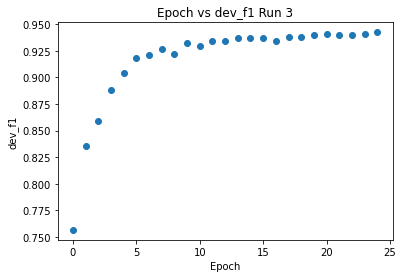

In [ ]:
plt.scatter(dev_f1_3x, dev_f1_3)
plt.ylabel('dev_f1')
plt.xlabel('Epoch')
plt.title('Epoch vs dev_f1 Run 3')
plt.show()

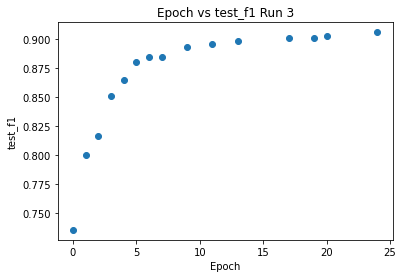

In [ ]:
plt.scatter(testX_f1_3, test_f1_3)
plt.ylabel('test_f1')
plt.xlabel('Epoch')
plt.title('Epoch vs test_f1 Run 3')
plt.show()

In [ ]:
run4 =[{"loss": 3.792021585477365, "dev_f1": 0.7599823710885852, "dev_acc": 0.9443946886803474, "test_f1": 0.7391866913123846, "test_acc": 0.9385808118875848},\
       {"loss": 2.403716218783646, "dev_f1": 0.8269144848539004, "dev_acc": 0.9577898056929247, "test_f1": 0.7901979264844486, "test_acc": 0.9506191450414558},\
       {"loss": 1.9992033887262408, "dev_f1": 0.8561428071403571, "dev_acc": 0.9647015303142401, "test_f1": 0.8182825484764542, "test_acc": 0.9570582534725961},\
       {"loss": 1.544367615762796, "dev_f1": 0.8941593517893315, "dev_acc": 0.9761496826447569, "test_f1": 0.8590687361419068, "test_acc": 0.9673091418111338},\
       {"loss": 1.0026922818209716, "dev_f1": 0.9104665825977302, "dev_acc": 0.9811533818776528, "test_f1": 0.8765551927997882, "test_acc": 0.9721976957036718},\
       {"loss": 0.8677916626391633, "dev_f1": 0.9123958596314061, "dev_acc": 0.9811533818776528, "test_f1": 0.8734210758766893, "test_acc": 0.9717885215893184},\
       {"loss": 0.7736005611938112, "dev_f1": 0.9204047217537942, "dev_acc": 0.983119816206534, "test_f1": 0.883622214361514, "test_acc": 0.9745019920318725},\
       {"loss": 0.7068539033176088, "dev_f1": 0.9259134534433406, "dev_acc": 0.9846773879521825, "test_f1": 0.8898936170212767, "test_acc": 0.9765047916442339},\
       {"loss": 0.673179304944603, "dev_f1": 0.9253706199460917, "dev_acc": 0.9844632218371558},\
       {"loss": 0.63134401434023, "dev_f1": 0.9310692669804976, "dev_acc": 0.9857676881741365, "test_f1": 0.8892017953005369, "test_acc": 0.9756218369764187},\
       {"loss": 0.6003778008171152, "dev_f1": 0.9348613802983062, "dev_acc": 0.9865075347533195, "test_f1": 0.8941883059530119, "test_acc": 0.9763109723269086},\
       {"loss": 0.5710770769103047, "dev_f1": 0.9338272436437112, "dev_acc": 0.986682761574705},\
       {"loss": 0.540089075445962, "dev_f1": 0.9361057328057917, "dev_acc": 0.9867411705151669, "test_f1": 0.8979844413012731, "test_acc": 0.9776461720684828},\
       {"loss": 0.5245126878326377, "dev_f1": 0.9387170193037174, "dev_acc": 0.9876173046220942, "test_f1": 0.9035056657223796, "test_acc": 0.9792828685258964},\
       {"loss": 0.5011242703034309, "dev_f1": 0.934892328398385, "dev_acc": 0.9868190491024493},\
       {"loss": 0.4743236821164857, "dev_f1": 0.936621496507028, "dev_acc": 0.9869358669833729},\
       {"loss": 0.46597064865789817, "dev_f1": 0.938809864489521, "dev_acc": 0.9875004867411705, "test_f1": 0.896521278474307, "test_acc": 0.9777107785075912},\
       {"loss": 0.4492501607229324, "dev_f1": 0.9389165051815656, "dev_acc": 0.9873057902729645, "test_f1": 0.9028490532649088, "test_acc": 0.9790459782491655},\
       {"loss": 0.43078091630464915, "dev_f1": 0.9416322749094584, "dev_acc": 0.988220863673533, "test_f1": 0.90552016985138, "test_acc": 0.9796920426402498},\
       {"loss": 0.42199297989553225, "dev_f1": 0.9403627161535216, "dev_acc": 0.9878314707371209},\
       {"loss": 0.4045938237120297, "dev_f1": 0.9414440980706041, "dev_acc": 0.9880261672053269},\
       {"loss": 0.3974129163426326, "dev_f1": 0.9416631490080203, "dev_acc": 0.9880066975585063, "test_f1": 0.9064607738729143, "test_acc": 0.9799720038763864},\
       {"loss": 0.3805184906998268, "dev_f1": 0.9402242643959194, "dev_acc": 0.9878120010903002},\
       {"loss": 0.37721783659378016, "dev_f1": 0.9442899283607248, "dev_acc": 0.9886102566099451, "test_f1": 0.9057605521635254, "test_acc": 0.9797781845590611}]

In [ ]:
dev_f1_4=[x['dev_f1'] for x in run4]
dev_f1_4x=[x for x in range(len(run4))]
test_f1_4=[x['test_f1'] for x in run4 if 'test_f1' in x.keys()]
testX_f1_4=[x for x in range(len(run4)) if 'test_f1' in run4[x].keys()]

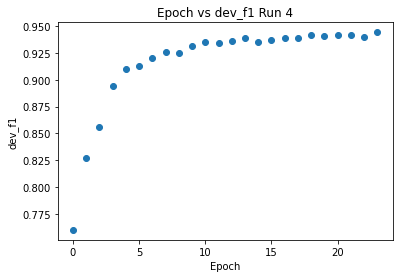

In [ ]:
plt.scatter(dev_f1_4x, dev_f1_4)
plt.ylabel('dev_f1')
plt.xlabel('Epoch')
plt.title('Epoch vs dev_f1 Run 4')
plt.show()

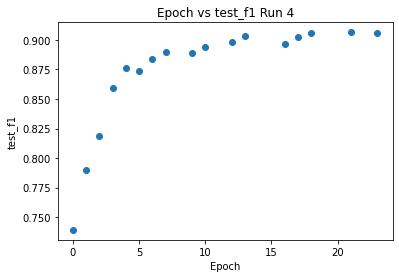

In [ ]:
plt.scatter(testX_f1_4, test_f1_4)
plt.ylabel('test_f1')
plt.xlabel('Epoch')
plt.title('Epoch vs test_f1 Run 4')
plt.show()

In [ ]:
f = open("data/train.txt", "r").readlines()

txt1=''
txt2=''
txt3=''
txt3=''
txt4=''
txt5=''
txt6=''
txt7=''
txt8=''

for x in range(len(f)):
  if  25006 >= x :
    txt1+=f[x]
    txt2+=f[x]
    txt3+=f[x]
    txt4+=f[x]
    txt5+=f[x]
    txt6+=f[x]
    txt7+=f[x]
    txt8+=f[x]
  elif 50015 >= x :
    txt2+=f[x]
    txt3+=f[x]
    txt4+=f[x]
    txt5+=f[x]
    txt6+=f[x]
    txt7+=f[x]
    txt8+=f[x]
  elif 75008 >= x :
    txt3+=f[x]
    txt4+=f[x]
    txt5+=f[x]
    txt6+=f[x]
    txt7+=f[x]
    txt8+=f[x]
  elif 100009 >= x :
    txt4+=f[x]
    txt5+=f[x]
    txt6+=f[x]
    txt7+=f[x]
    txt8+=f[x]
  elif 125002 >= x :
    txt5+=f[x]
    txt6+=f[x]
    txt7+=f[x]
    txt8+=f[x]
  elif 150007 >= x :  
    txt6+=f[x]
    txt7+=f[x]
    txt8+=f[x]
  elif 175032 >= x :
    txt7+=f[x]
    txt8+=f[x]
  elif 200016 >= x :
    txt8+=f[x]
f1 = open("data/train1.txt", "w")
f2 = open("data/train2.txt", "w")
f3 = open("data/train3.txt", "w")
f4 = open("data/train4.txt", "w")
f5 = open("data/train5.txt", "w")
f6 = open("data/train6.txt", "w")
f7 = open("data/train7.txt", "w")
f8 = open("data/train8.txt", "w")

f1.write(txt1)
f1.close()
f2.write(txt2)
f2.close()
f3.write(txt3)
f3.close()
f4.write(txt4)
f4.close()
f5.write(txt5)
f5.close()
f6.write(txt6)
f6.close()
f7.write(txt7)
f7.close()
f8.write(txt8)
f8.close()


In [ ]:
# Run 1

!cd LM-LSTM-CRF ; python -W ignore train_wc.py \
  --emb_file embedding/glove.6B.100d.txt \
  --train_file ../data/train1.txt \
  --dev_file ../data/valid.txt \
  --test_file ../data/test.txt \
  --checkpoint ../checkpoint/nerc1_ \
  --caseless --fine_tune --high_way --co_train --epoch 25


setting:
Namespace(batch_size=10, caseless=True, char_dim=30, char_hidden=300, char_layers=1, checkpoint='../checkpoint/nerc1_', clip_grad=5.0, co_train=True, dev_file='../data/valid.txt', drop_out=0.55, emb_file='embedding/glove.6B.100d.txt', epoch=25, eva_matrix='fa', fine_tune=False, gpu=0, high_way=True, highway_layers=1, lambda0=1, least_iters=50, load_check_point='', load_opt=False, lr=0.015, lr_decay=0.05, mini_count=5, momentum=0.9, patience=15, rand_embedding=False, shrink_embedding=False, small_crf=True, start_epoch=0, test_file='../data/test.txt', train_file='../data/train1.txt', unk='unk', update='sgd', word_dim=100, word_hidden=300, word_layers=1)
loading corpus
constructing coding table
feature size: '692'
loading embedding
embedding size: '400003'
constructing dataset
building model
device: 0
DEV : total : dev_f1: 0.3774 dev_rec: 0.2659 dev_pre: 0.6502 dev_acc: 0.8731 | 

DEV : B-LOC : dev_f1: 0.3920 dev_rec: 0.2673 dev_pre: 0.7350 dev_acc: 0.0000 | {'O': 1189, 'B-PER': 

In [ ]:
# Run 2

!cd LM-LSTM-CRF ; python -W ignore train_wc.py \
  --emb_file embedding/glove.6B.100d.txt \
  --train_file ../data/train2.txt \
  --dev_file ../data/valid.txt \
  --test_file ../data/test.txt \
  --checkpoint ../checkpoint/nerc2_ \
  --caseless --fine_tune --high_way --co_train --epoch 25


setting:
Namespace(batch_size=10, caseless=True, char_dim=30, char_hidden=300, char_layers=1, checkpoint='../checkpoint/nerc2_', clip_grad=5.0, co_train=True, dev_file='../data/valid.txt', drop_out=0.55, emb_file='embedding/glove.6B.100d.txt', epoch=25, eva_matrix='fa', fine_tune=False, gpu=0, high_way=True, highway_layers=1, lambda0=1, least_iters=50, load_check_point='', load_opt=False, lr=0.015, lr_decay=0.05, mini_count=5, momentum=0.9, patience=15, rand_embedding=False, shrink_embedding=False, small_crf=True, start_epoch=0, test_file='../data/test.txt', train_file='../data/train2.txt', unk='unk', update='sgd', word_dim=100, word_hidden=300, word_layers=1)
loading corpus
constructing coding table
feature size: '1382'
loading embedding
embedding size: '400011'
constructing dataset
building model
device: 0
DEV : total : dev_f1: 0.5884 dev_rec: 0.5094 dev_pre: 0.6963 dev_acc: 0.9029 | 

DEV : B-LOC : dev_f1: 0.7144 dev_rec: 0.6848 dev_pre: 0.7466 dev_acc: 0.0000 | {'O': 471, 'B-ORG': 

In [ ]:
# Run 3

!cd LM-LSTM-CRF ; python -W ignore train_wc.py \
  --emb_file embedding/glove.6B.100d.txt \
  --train_file ../data/train3.txt \
  --dev_file ../data/valid.txt \
  --test_file ../data/test.txt \
  --checkpoint ../checkpoint/nerc3_ \
  --caseless --fine_tune --high_way --co_train --epoch 25


setting:
Namespace(batch_size=10, caseless=True, char_dim=30, char_hidden=300, char_layers=1, checkpoint='../checkpoint/nerc3_', clip_grad=5.0, co_train=True, dev_file='../data/valid.txt', drop_out=0.55, emb_file='embedding/glove.6B.100d.txt', epoch=25, eva_matrix='fa', fine_tune=False, gpu=0, high_way=True, highway_layers=1, lambda0=1, least_iters=50, load_check_point='', load_opt=False, lr=0.015, lr_decay=0.05, mini_count=5, momentum=0.9, patience=15, rand_embedding=False, shrink_embedding=False, small_crf=True, start_epoch=0, test_file='../data/test.txt', train_file='../data/train3.txt', unk='unk', update='sgd', word_dim=100, word_hidden=300, word_layers=1)
loading corpus
constructing coding table
feature size: '2011'
loading embedding
embedding size: '400020'
constructing dataset
building model
device: 0
DEV : total : dev_f1: 0.5891 dev_rec: 0.4711 dev_pre: 0.7862 dev_acc: 0.9090 | 

DEV : B-LOC : dev_f1: 0.6290 dev_rec: 0.4878 dev_pre: 0.8854 dev_acc: 0.0000 | {'O': 813, 'B-ORG': 

In [ ]:
# Run 4

!cd LM-LSTM-CRF ; python -W ignore train_wc.py \
  --emb_file embedding/glove.6B.100d.txt \
  --train_file ../data/train4.txt \
  --dev_file ../data/valid.txt \
  --test_file ../data/test.txt \
  --checkpoint ../checkpoint/nerc4_ \
  --caseless --fine_tune --high_way --co_train --epoch 25


setting:
Namespace(batch_size=10, caseless=True, char_dim=30, char_hidden=300, char_layers=1, checkpoint='../checkpoint/nerc4_', clip_grad=5.0, co_train=True, dev_file='../data/valid.txt', drop_out=0.55, emb_file='embedding/glove.6B.100d.txt', epoch=25, eva_matrix='fa', fine_tune=False, gpu=0, high_way=True, highway_layers=1, lambda0=1, least_iters=50, load_check_point='', load_opt=False, lr=0.015, lr_decay=0.05, mini_count=5, momentum=0.9, patience=15, rand_embedding=False, shrink_embedding=False, small_crf=True, start_epoch=0, test_file='../data/test.txt', train_file='../data/train4.txt', unk='unk', update='sgd', word_dim=100, word_hidden=300, word_layers=1)
loading corpus
constructing coding table
feature size: '2529'
loading embedding
embedding size: '400031'
constructing dataset
building model
device: 0
DEV : total : dev_f1: 0.6781 dev_rec: 0.5868 dev_pre: 0.8029 dev_acc: 0.9259 | 

DEV : B-LOC : dev_f1: 0.7586 dev_rec: 0.6619 dev_pre: 0.8882 dev_acc: 0.0000 | {'O': 489, 'B-ORG': 

In [ ]:
# Run 5

!cd LM-LSTM-CRF ; python -W ignore train_wc.py \
  --emb_file embedding/glove.6B.100d.txt \
  --train_file ../data/train5.txt \
  --dev_file ../data/valid.txt \
  --test_file ../data/test.txt \
  --checkpoint ../checkpoint/nerc5_ \
  --caseless --fine_tune --high_way --co_train --epoch 25


setting:
Namespace(batch_size=10, caseless=True, char_dim=30, char_hidden=300, char_layers=1, checkpoint='../checkpoint/nerc5_', clip_grad=5.0, co_train=True, dev_file='../data/valid.txt', drop_out=0.55, emb_file='embedding/glove.6B.100d.txt', epoch=25, eva_matrix='fa', fine_tune=False, gpu=0, high_way=True, highway_layers=1, lambda0=1, least_iters=50, load_check_point='', load_opt=False, lr=0.015, lr_decay=0.05, mini_count=5, momentum=0.9, patience=15, rand_embedding=False, shrink_embedding=False, small_crf=True, start_epoch=0, test_file='../data/test.txt', train_file='../data/train5.txt', unk='unk', update='sgd', word_dim=100, word_hidden=300, word_layers=1)
loading corpus
constructing coding table
feature size: '3078'
loading embedding
embedding size: '400035'
constructing dataset
building model
device: 0
DEV : total : dev_f1: 0.7201 dev_rec: 0.6589 dev_pre: 0.7938 dev_acc: 0.9354 | 

DEV : B-LOC : dev_f1: 0.8001 dev_rec: 0.7267 dev_pre: 0.8900 dev_acc: 0.0000 | {'O': 340, 'I-ORG': 

In [ ]:
# Run 6

!cd LM-LSTM-CRF ; python -W ignore train_wc.py \
  --emb_file embedding/glove.6B.100d.txt \
  --train_file ../data/train6.txt \
  --dev_file ../data/valid.txt \
  --test_file ../data/test.txt \
  --checkpoint ../checkpoint/nerc6_ \
  --caseless --fine_tune --high_way --co_train --epoch 25


setting:
Namespace(batch_size=10, caseless=True, char_dim=30, char_hidden=300, char_layers=1, checkpoint='../checkpoint/nerc6_', clip_grad=5.0, co_train=True, dev_file='../data/valid.txt', drop_out=0.55, emb_file='embedding/glove.6B.100d.txt', epoch=25, eva_matrix='fa', fine_tune=False, gpu=0, high_way=True, highway_layers=1, lambda0=1, least_iters=50, load_check_point='', load_opt=False, lr=0.015, lr_decay=0.05, mini_count=5, momentum=0.9, patience=15, rand_embedding=False, shrink_embedding=False, small_crf=True, start_epoch=0, test_file='../data/test.txt', train_file='../data/train6.txt', unk='unk', update='sgd', word_dim=100, word_hidden=300, word_layers=1)
loading corpus
constructing coding table
feature size: '3609'
loading embedding
embedding size: '400041'
constructing dataset
building model
device: 0
DEV : total : dev_f1: 0.7257 dev_rec: 0.6577 dev_pre: 0.8093 dev_acc: 0.9369 | 

DEV : B-LOC : dev_f1: 0.8234 dev_rec: 0.7714 dev_pre: 0.8829 dev_acc: 0.0000 | {'O': 308, 'B-ORG': 

In [ ]:
# Run 7

!cd LM-LSTM-CRF ; python -W ignore train_wc.py \
  --emb_file embedding/glove.6B.100d.txt \
  --train_file ../data/train7.txt \
  --dev_file ../data/valid.txt \
  --test_file ../data/test.txt \
  --checkpoint ../checkpoint/nerc7_ \
  --caseless --fine_tune --high_way --co_train --epoch 25


setting:
Namespace(batch_size=10, caseless=True, char_dim=30, char_hidden=300, char_layers=1, checkpoint='../checkpoint/nerc7_', clip_grad=5.0, co_train=True, dev_file='../data/valid.txt', drop_out=0.55, emb_file='embedding/glove.6B.100d.txt', epoch=25, eva_matrix='fa', fine_tune=False, gpu=0, high_way=True, highway_layers=1, lambda0=1, least_iters=50, load_check_point='', load_opt=False, lr=0.015, lr_decay=0.05, mini_count=5, momentum=0.9, patience=15, rand_embedding=False, shrink_embedding=False, small_crf=True, start_epoch=0, test_file='../data/test.txt', train_file='../data/train7.txt', unk='unk', update='sgd', word_dim=100, word_hidden=300, word_layers=1)
loading corpus
constructing coding table
feature size: '4106'
loading embedding
embedding size: '400046'
constructing dataset
building model
device: 0
DEV : total : dev_f1: 0.7565 dev_rec: 0.7105 dev_pre: 0.8088 dev_acc: 0.9435 | 

DEV : B-LOC : dev_f1: 0.8529 dev_rec: 0.8525 dev_pre: 0.8534 dev_acc: 0.0000 | {'O': 146, 'B-ORG': 

In [ ]:
# Run 8

!cd LM-LSTM-CRF ; python -W ignore train_wc.py \
  --emb_file embedding/glove.6B.100d.txt \
  --train_file ../data/train8.txt \
  --dev_file ../data/valid.txt \
  --test_file ../data/test.txt \
  --checkpoint ../checkpoint/nerc8_ \
  --caseless --fine_tune --high_way --co_train --epoch 25


setting:
Namespace(batch_size=10, caseless=True, char_dim=30, char_hidden=300, char_layers=1, checkpoint='../checkpoint/nerc8_', clip_grad=5.0, co_train=True, dev_file='../data/valid.txt', drop_out=0.55, emb_file='embedding/glove.6B.100d.txt', epoch=25, eva_matrix='fa', fine_tune=False, gpu=0, high_way=True, highway_layers=1, lambda0=1, least_iters=50, load_check_point='', load_opt=False, lr=0.015, lr_decay=0.05, mini_count=5, momentum=0.9, patience=15, rand_embedding=False, shrink_embedding=False, small_crf=True, start_epoch=0, test_file='../data/test.txt', train_file='../data/train8.txt', unk='unk', update='sgd', word_dim=100, word_hidden=300, word_layers=1)
loading corpus
constructing coding table
feature size: '4582'
loading embedding
embedding size: '400055'
constructing dataset
building model
device: 0
DEV : total : dev_f1: 0.7666 dev_rec: 0.7050 dev_pre: 0.8400 dev_acc: 0.9455 | 

DEV : B-LOC : dev_f1: 0.8379 dev_rec: 0.7681 dev_pre: 0.9216 dev_acc: 0.0000 | {'O': 276, 'B-ORG': 

(10 points) Examine how performance improves as more training data is used. The training file has about 220K lines. **First, divide the data into 25K line chunks (preferably splitting between sentences). Then incrementally, train a system on the first chunk, the first two chunks, the first three chunks, etc. Run each on the same number of iterations** (at least 20, but you may select a higher number if you’d like to see more realistic performance numbers). **Plot the F1 learning curve as additional training data is made available.**


In [ ]:
f1s = [0.7779, 0.8243, 0.8868, 0.8858, 0.8941, 0.8993, 0.8952, 0.9042, 0.9042]
f1x = [(i+1)*25000 for i in range(9)]

In [ ]:
import matplotlib.pyplot as plt



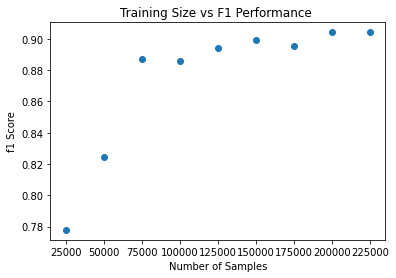

In [ ]:

plt.scatter(f1x, f1s)
plt.ylabel('f1 Score')
plt.xlabel('Number of Samples')
plt.title('Training Size vs F1 Performance ')
plt.show()

(10 points) Study how performance changes when we don’t care about entity types. **First, create a copy of the training data and map all entity types in the copy onto a single entity type, ENT (i.e., map B-PER to B-ENT, I-PER to I-ENT, etc.).**

**Retrain the system on the new data, using the same number of iterations as you did in your first training. Compare the scores in overall precision, recall, and F1, when type information is included (using your base run) against this new run that maps all types to ENT.**

**Describe why you think there is/is not a difference.**

A difference does exists because when we map all results to B-ENT, I-ENT, we are allowing incorrectly identified entities to be mapped to correct ones. 

In [ ]:
!cd LM-LSTM-CRF ; python -W ignore train_wc.py \
  --emb_file embedding/glove.6B.100d.txt \
  --train_file ../data/trainENT.txt \
  --dev_file ../data/validENT.txt \
  --test_file ../data/testENT.txt \
  --checkpoint ../checkpoint/nerENT_ \
  --caseless --fine_tune --high_way --co_train --epoch 25

setting:
Namespace(batch_size=10, caseless=True, char_dim=30, char_hidden=300, char_layers=1, checkpoint='../checkpoint/nerENT_', clip_grad=5.0, co_train=True, dev_file='../data/validENT.txt', drop_out=0.55, emb_file='embedding/glove.6B.100d.txt', epoch=25, eva_matrix='fa', fine_tune=False, gpu=0, high_way=True, highway_layers=1, lambda0=1, least_iters=50, load_check_point='', load_opt=False, lr=0.015, lr_decay=0.05, mini_count=5, momentum=0.9, patience=15, rand_embedding=False, shrink_embedding=False, small_crf=True, start_epoch=0, test_file='../data/testENT.txt', train_file='../data/trainENT.txt', unk='unk', update='sgd', word_dim=100, word_hidden=300, word_layers=1)
loading corpus
constructing coding table
feature size: '4915'
loading embedding
embedding size: '400060'
constructing dataset
building model
device: 0
DEV : total : dev_f1: 0.8022 dev_rec: 0.7351 dev_pre: 0.8828 dev_acc: 0.9541 | 

DEV : B-ENT : dev_f1: 0.8665 dev_rec: 0.7940 dev_pre: 0.9535 dev_acc: 0.0000 | {'O': 1080,

TEST Overall Total | Result         |Mapped to ENT
-------------------|----------------|---------------
Test_f1:           |0.9042          |0.9499
Test_recall:       |0.9012          |0.9525
Test_precision:    |0.9073          |0.9472
Test_accuracy:     |0.9794          |0.9891

(10 points) Explore how the system works on examples of your own selection. **First, create a new test file, in the same format as testb.txt (one token per line, blank lines between sentences), containing at least ten sentences.**

**You should include at least ten named entities of each of the three types PER, ORG, and LOC.**

**Your examples should include entities you think will be easy to identify, as well as a variety of difficult cases. Run the decoder from the checkpointed model on your test file: ```**

!python3 -W ignore seq_wc.py --load_arg checkpoint/ner_cwlm_lstm_crf.json --load_check_point checkpoint/ner_cwlm_lstm_crf.model --gpu 0 --input_file data/my-test-file.txt --output_file my-test-file.out TheREADME.mdfile gives further details how to use theseq_wc.pyscript. The--load_argfile and the--load_check_pointfile will both be found in thecheckpoint``` directory you created at the start of the Lab.

**Include a printout of your output file (my-test-file.out) in your pdf submission. Indicate whether the system failed on any of your easy examples, and describe how it fared on your difficult examples.**

In [4]:
!cd LM-LSTM-CRF ;python3 -W ignore seq_wc.py --load_arg ../checkpoint/ner_cwlm_lstm_crf.json\
 --load_check_point ../checkpoint/ner_cwlm_lstm_crf.model --gpu 0\
  --input_file ../data/testUpdated_ad.txt --output_file my-test-file-Sutton3.out

loading dictionary
loading corpus
loading model
annotating


The model failed on two harder examples. Mistakes are found in attached to Cat and Lockheed Martin which are organizations but they were labeled as Loc and Per respectively. The rest of all the examples passed by correcly identifying people and locations and organzations 

In [ ]:
# -DOCSTART- -DOCSTART- -DOCSTART-

# <PER> Juan Bonilla </PER> ran from the <LOC> St Lucia </LOC> to <LOC> Cat </LOC> .  # Cat is an organization as in Caterpillar 

# <PER> Miriam Bonilla </PER> ran from <LOC> Camden New Jersey </LOC> to <PER> Lockheed Martin </PER> .  # Lockheed Martin is an Organization 

# <PER> Ava Schmick </PER> drove the truck to <LOC> Hawaii </LOC> from <LOC> Gamestop </LOC> . 

# <PER> Dan Schmick </PER> walked to <ORG> Penn State </ORG> after buying brush from <ORG> Walmart </ORG> . 

# <PER> Lesley Schmick </PER> drove the truck to <LOC> Newark </LOC> from <ORG> Chrysler </ORG> . 

# <PER> Khloe Sutton </PER> ran from the <LOC> North Wilmington </LOC> to <ORG> Northrup Grumman </ORG> . 

# <PER> Megan Wright </PER> ran from <LOC> North Wilmington </LOC> to <ORG> Boeing </ORG> . 

# <PER> Marybeth Sutton </PER> drove the truck to <LOC> Bear Delaware </LOC> from <LOC> Gamestop </LOC> . 

# <PER> Aleah Sutton </PER> walked to <ORG> Penn State </ORG> after buying brush from <ORG> Walmart </ORG> . 

# <PER> Marybeth Sutton </PER> drove the truck to <LOC> Delaware City </LOC> from <ORG> Chrysler </ORG> . 

In [ ]:
! ls LM-LSTM-CRF

docs	    LICENSE		      my-test-file-Suttonlab08.out  seq_wc.py
embedding   model		      my-test-file-Sutton.out	    seq_w.py
eval_wc.py  my-test-file-Sutton2.out  README.md			    train_wc.py
eval_w.py   my-test-file-Sutton3.out  requirements.txt		    train_w.py


In [5]:
! cat LM-LSTM-CRF/my-test-file-Sutton3.out

-DOCSTART- -DOCSTART- -DOCSTART-

<PER> Juan Sonilla </PER> ran from the <LOC> Saint Lucia </LOC> to <LOC> Caterpiller </LOC> . 

<PER> Miriam Sonilla </PER> Ran from <LOC> Camden New Jersey </LOC> to <ORG> Lockheed Martin </ORG> . 

<PER> Ava Chmick </PER> drove the truck to <LOC> Hawaii </LOC> from <LOC> Gamestop </LOC> . 

<PER> Dan Chmick </PER> walked to <ORG> Penn State </ORG> after buying brush from <ORG> Walmart </ORG> . 

<PER> Lesley Chmick </PER> drove the truck to <LOC> Newark </LOC> from <ORG> Chrysler </ORG> . 

<PER> Khloe Sutton </PER> ran from the <LOC> North Wilmington </LOC> to <ORG> Northrup Grumman </ORG> . 

<PER> Megan Black </PER> ran from <LOC> North Wilmington </LOC> to <ORG> Boeing </ORG> . 

<PER> Marybeth Sutton </PER> drove the truck to <LOC> Bear Delaware </LOC> from <LOC> Gamestop </LOC> . 

<PER> Aleah Sutton </PER> walked to <ORG> Penn State </ORG> after buying brush from <ORG> Walmart </ORG> . 

<PER> Marybeth Sutton </PER> drove the truck to <LOC> De